# Neural Network

This lab uses the MNIST dataset and it is imported using Keras. 
      
The [github](https://github.com/jordanott/CPSC392/blob/master/Notebooks/Neural%20Networks.ipynb) repository of the notebook that was used to help.      
      
The [instructions](https://docs.google.com/document/d/1xAIvqCtkxm40Y-8vdJCuIKyiy0hKztkZTz2M7FRSP5w/edit) for the lab. [This](https://github.com/jordanott/CPSC392/blob/master/Labs/NeuralNetworks.ipynb) is where the lab actually is.       

---

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

np.random.seed(0)

### Loading MNIST Dataset

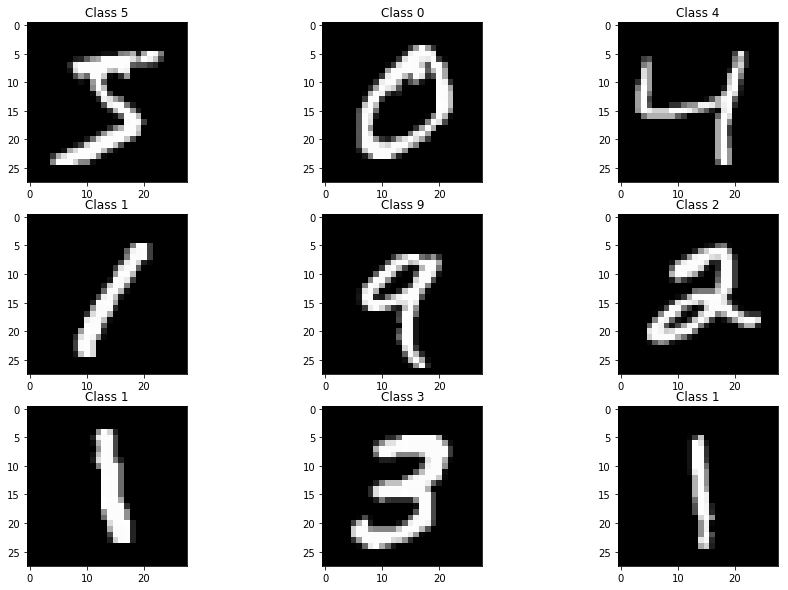

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(15,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
plt.show()

In [45]:

def show_img(img, label):
    img = img.reshape(28,28)
    
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    
    if type(label) == np.uint8:
        zeros = np.zeros(10)
        zeros[label] = 1
        label = zeros
    
    plt.subplot(1, 2, 2)
    plt.bar(np.arange(10), label, tick_label=np.arange(10))
    plt.show()

### Show Image

In [46]:
X = x_train; Y = y_train
zeros = np.zeros(10); zeros[Y] = 1

X.shape, Y.shape

((60000, 28, 28), (60000,))

## Forward pass for a single example
Here we implement the forward pass for the network using the single example, $X$, from above

#### Initialize weights

In [47]:
X = X.reshape(60000, 784)

In [48]:
W1 = np.random.randn(784,10)# create weights for the first layer
W2 = np.random.randn(10, 1)# create weights for the second layer

#### First layer activations

In [49]:
Z1 = np.dot(X, W1)

def relu(z):
    return z * (z > 0)

X2 = relu(Z1)
L1 = X2
X2.shape

(60000, 10)

#### Second layer activations

In [50]:
def softmax(z):
    # subracting the max adds numerical stability
    shiftx = z - np.max(z,axis=1)[:,np.newaxis]
    exps = np.exp(shiftx)
    return exps / np.sum(exps,axis=1)[:,np.newaxis]

Z2 = np.dot(X2, W2)

Y_hat = softmax(Z2)
Y_hat.shape, Y.shape

((60000, 1), (60000,))

## Backward Pass for Single Example

#### Functions

In [51]:
def d_relu(g):
    return g>0 

def d_softmax(Y_hat, Y):
    return Y_hat - Y

In [ ]:
cost = 0
for x in range(len(Y_hat)):
    cost += np.sum( - (Y[x] * np.log(Y_hat[x]) + (1 - Y[x]) * np.log(1 - Y_hat[x])) )
#cost = np.sum( - (Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat)) )

dJ_dZ2 = d_softmax(Y_hat,Y)        
dJ_dtheta2 = np.dot(L1.T, dJ_dZ2)                      # compute gradients
dJ_db2 = np.sum(dJ_dZ2, axis=0, keepdims=True)
    
dJ_dZ1 = np.dot(dJ_dZ2, W2) * d_relu(L1)
dJ_db1 = np.sum(dJ_dZ1, axis=0, keepdims=True)
print(cost)


## Keras

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense

### Load Data

In [6]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32').reshape(-1,784)
x_test = x_test.astype('float32').reshape(-1,784)

x_train /= 255.; x_test /= 255.

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Making a Model

In [7]:
model = Sequential()
model.add(Dense(256, activation='relu',input_shape=(784,)))
model.add(Dense(256, activation='relu'))

model.add(Dense(model.fit(x_train, y_train,batch_size=32,epochs=10,verbose=1,validation_data=(x_test, y_test))10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

### Training Model

In [8]:
model.fit(x_train, y_train,batch_size=32,epochs=10,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.2078 - acc: 0.9372 - val_loss: 0.0930 - val_acc: 0.9703
Epoch 2/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.0817 - acc: 0.9752 - val_loss: 0.0840 - val_acc: 0.9745
Epoch 3/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0552 - acc: 0.9834 - val_loss: 0.0760 - val_acc: 0.9754
Epoch 4/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0400 - acc: 0.9877 - val_loss: 0.0649 - val_acc: 0.9809
Epoch 5/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.0291 - acc: 0.9910 - val_loss: 0.0669 - val_acc: 0.9806
Epoch 6/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.0224 - acc: 0.9932 - val_loss: 0.0734 - val_acc: 0.9810
Epoch 7/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.0171 - acc: 0.9947 - val_loss: 0.

## Statement of Collaboration

#### a. Whom I worked with:
The bulk of this I did myself, however, you gave most of the code for this lab so I guess I worked with you? But I also did some of it with Tucker, Matt, and Kolby
#### b. Resources Used:
The only resources I used was your notebook for this assignment and your slides.